# Advetising case Study

Set up

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (datasets,linear_model,model_selection,metrics)
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Importing the Dataset
adv = pd.read_csv('advertising.csv')

# Checking the first 5 rows of the dataset
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
# Checking the Info of the dataset
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
# Statistics of the dataset
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


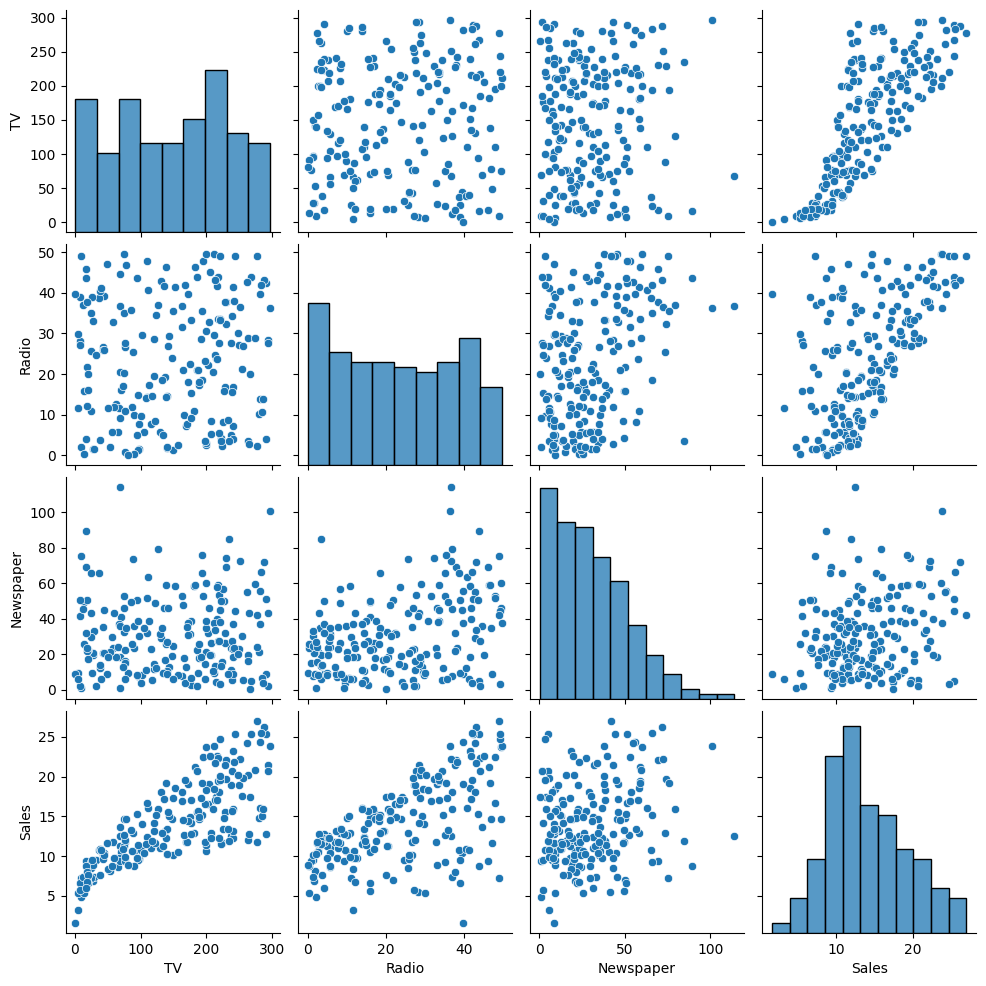

In [12]:
# Visualizing the dataset
sns.pairplot(adv)

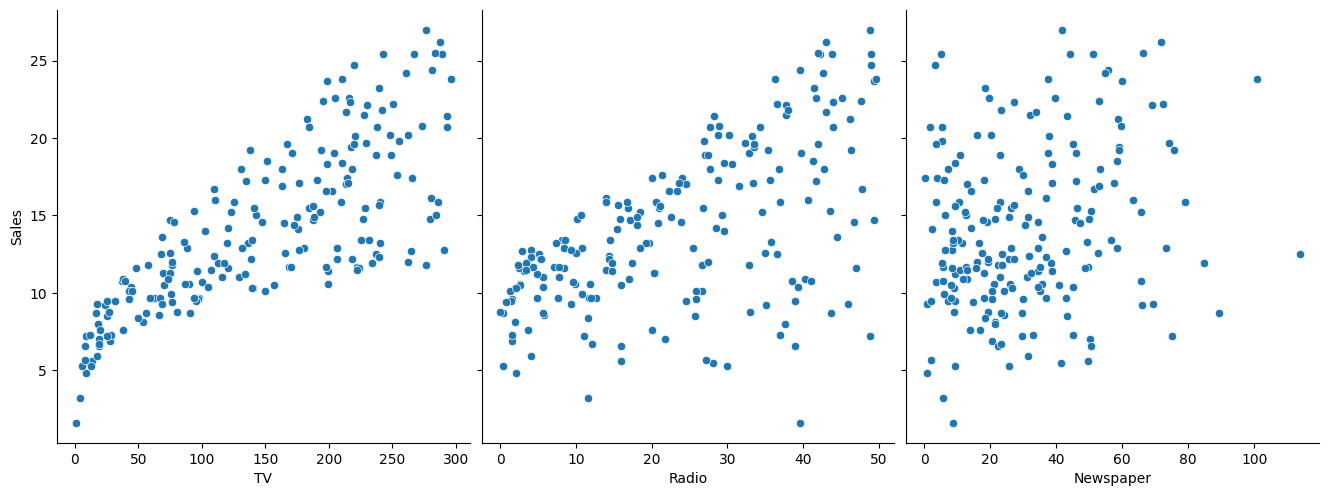

In [16]:
# only the Scatter
sns.pairplot(x_vars=['TV','Radio','Newspaper'],y_vars='Sales',data=adv,kind='scatter',aspect=0.9,size=5)

In [20]:
# Step 3 Splitting The Dataset for Training and Testing Set

x = adv[['TV','Radio','Newspaper']]
y = adv['Sales'].values.reshape(-1,1)

X_train,X_test,Y_train,Y_test = model_selection.train_test_split(x,y,test_size=0.3,random_state=100,shuffle=True)


In [24]:
# Bulidng the Model
lr = linear_model.LinearRegression()
cv = model_selection.cross_val_score(lr,x,y,scoring='r2',cv=5)
cv.mean()
 

0.8871063495438436

In [33]:
lr.fit(X_train,Y_train)
coeff = lr.coef_
ypred = lr.predict(X_test)
coeff

array([[0.0454256 , 0.18975773, 0.00460308]])

In [34]:
r2 = metrics.r2_score(Y_test,ypred)
r2

0.9058622107532246

In [35]:
# Chceking the P Values
import statsmodels.api as sm
X = sm.add_constant(x)
ols = sm.OLS(y,X).fit()
print(ols.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 12 Apr 2025   Prob (F-statistic):           1.58e-96
Time:                        22:32:40   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

<Axes: >

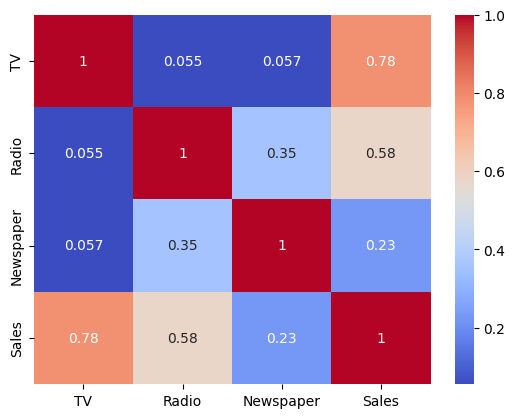

In [40]:
sns.heatmap(adv.corr(),annot=True,cmap='coolwarm')